In [1]:
#Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)#Random seeds, random to the same array at a time

ModuleNotFoundError: No module named 'cv2'

In [ ]:
def fcm(X,k,b):
    iter = 0
    N,p = X.shape

    P = np.random.randn(N,k)#Generating Random Numbers with Normal Distribution

    P = P / np.dot(np.sum(P,1).reshape(N,1),np.ones((1,k)))

    J_prev = np.inf
    J = []

    while True:
        t = pow(P,b)
        #Here's a concrete iteration algorithm
        C = np.dot(X.T, t).T / (sum(t, 0).reshape(k, 1) * np.ones((1, p)))

        dist = np.dot(np.sum(C*C,1).reshape(k,1),np.ones((1,N))).T+\
               np.sum(X*X,1).reshape(N,1)*np.ones((1, k)) - \
               2*np.dot(X,C.T)

        t2 = pow(1.0/dist,1.0/(b-1))
        P = t2/(np.sum(t2,1).reshape(N,1)*np.ones((1,k)))
        J_cur = sum(sum((pow(P,b))*dist,0),0)/ N
        J.append(J_cur)

        # print(iter, J_cur)
        if abs(J_cur - J_prev) < 0.001:
            #Stop iteration when the error after iteration is less than 0.001
            break

        iter += 1

        J_prev = J_cur
    return C,dist,J

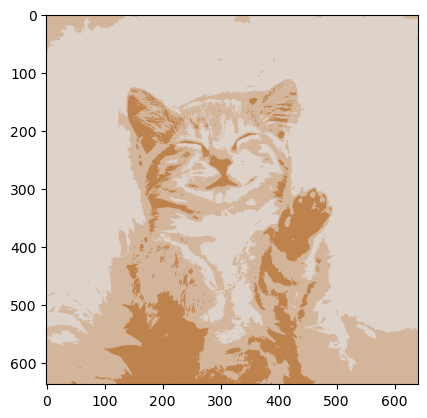

<Figure size 640x480 with 0 Axes>

In [ ]:
image = cv2.imread('data/cute-cat.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
m,n,p = image.shape
image = image.astype(np.double)#This step is critical for converting to double type
image = image.reshape(m*n,p)
C,dist,J = fcm(image,3,2)
#J is the error value of each iteration, which can be displayed by plot.
label = dist.argmin(axis=1)
# print(label.shape)
img_1 = C[label,:]
segmented_image_cmeans = img_1.reshape(m,n,p)/255
plt.imshow(segmented_image_cmeans,cmap='gray')
plt.savefig('outputs/cute-cat-cmeans.jpg')
plt.show()

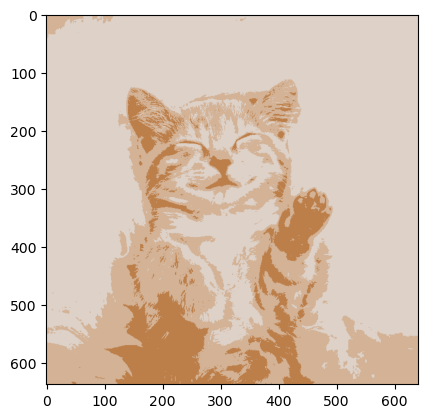

<Figure size 640x480 with 0 Axes>

In [ ]:
image = cv2.imread("data/cute-cat.jpg")
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
# print(pixel_values.shape)
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()
# convert all pixels to the color of the centroids
segmented_image_kmeans = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image_kmeans = segmented_image_kmeans.reshape(image.shape)
# show the image
plt.imshow(segmented_image_kmeans)
plt.savefig('outputs/cute-cat-kmeans.jpg')
plt.show()

Text(0.5, 1.0, 'c-means')

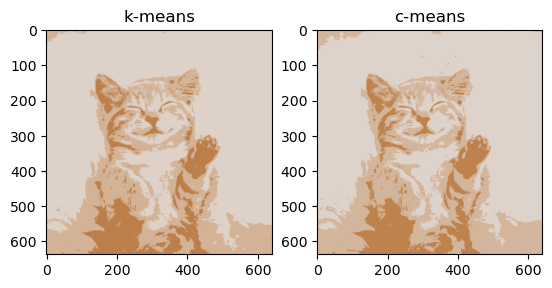

In [ ]:
figure, axis = plt.subplots(1, 2)
axis[0].imshow(segmented_image_kmeans)
axis[0].set_title("k-means")

axis[1].imshow(segmented_image_cmeans)
axis[1].set_title("c-means")

In [ ]:
def mse(img1, img2):
   h, w, t = img1.shape
   diff = cv2.subtract(img1, img2, dtype=cv2.CV_64F)
   err = np.sum(diff**2)
   mse = err/(float(h*w))
   return mse, diff

Text(0.5, 1.0, 'Difference')

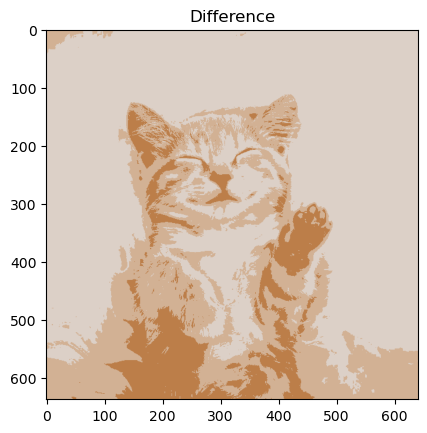

In [ ]:
# segmented_image_kmeans.shape
# image1 = np.asarray(segmented_image_cmeans, np.float64)
# image2 = np.asarray(segmented_image_kmeans, np.float64)
error, diff = mse(segmented_image_cmeans, segmented_image_kmeans)
plt.imshow(np.abs(diff/255))
plt.title("Difference")
# diff
# np.abs(cv2.bitwise_not(diff/255))